 <h1>Compresores </h1>

In [26]:
"""Esta funcion esta diseñada para calcular el costo de los compresores de diafragma.
Se basa en la ecuación con coeficientes K1, K2, K3 de libro "Analysis, Synthesis, and Design of Chemical Processes
de Richard Turton 

Para que el codigo funcione se necesita ingresar una tabla con los siguientes datos:
- El número de compresores
- La potencia de cada compresor (kW)
-Spares Number
- Material del compresor el cual puede ser:
    -Carbon Steel
    -Stainless Steel
    -Nickel Alloy
Los coeficientes para el tipo de compresor son los datos para compresor reciprocanntes ya que los compresores de diafragma no tienen coeficientes en el libro mencionado.
"""

'Esta funcion esta diseñada para calcular el costo de los compresores de diafragma.\nSe basa en la ecuación con coeficientes K1, K2, K3 de libro "Analysis, Synthesis, and Design of Chemical Processes\nde Richard Turton \n\nPara que el codigo funcione se necesita ingresar una tabla con los siguientes datos:\n- El número de compresores\n- La potencia de cada compresor (kW)\n-Spares Number\n- Material del compresor el cual puede ser:\n    -Carbon Steel\n    -Stainless Steel\n    -Nickel Alloy\nLos coeficientes para el tipo de compresor son los datos para compresor reciprocanntes ya que los compresores de diafragma no tienen coeficientes en el libro mencionado.\n'

In [27]:
import pandas as pd

data = {
    "Compressor": ["No. 1", "No. 2", "No. 3", "Total"],
    "T (K)": [298.15, 298.15, 298.15, 298.15],
    "P (bar)": [32,157, 284,472],
    "Cooling H2O (kg/s)": [5.704003, 2.639239, 1.725646, 10.068889],
    "W (kW) Python": [249, 77, 49, 375],
}

prueba = pd.DataFrame(data)
prueba

,Compressor,T (K),P (bar),Cooling H2O (kg/s),W (kW) Python
0,No. 1,298.15,32,5.704003,249
1,No. 2,298.15,157,2.639239,77
2,No. 3,298.15,284,1.725646,49
3,Total,298.15,472,10.068889,375


In [28]:

import pandas as pd
import math

class PriceCalculator:
    def __init__(self, dataframe,spares,material):
        self.dataframe = dataframe
        self.spares = spares
        self.material = material
        self.calculate_price()

    def calculate_price(self):
        prices = []
        cepci_2001 = 397
        cepci_2024 = 798.8
        k1=2.2897
        k2=1.3604
        k3=-0.1027
        if self.material == "Carbon Steel":
            sFBM=3.4
        elif self.material == "Stainless Steel":
            sFBM=7.0
        else:
            sFBM=13.9 #for Nickel Alloy
        FBMCS=3.4 #for Carbon Steel

        for index, row in self.dataframe.iterrows():
            if index < len(self.dataframe) - 1:  # For all rows except the last one
                w_value = row["W (kW) Python"]
                A = k1+(k2*math.log10(w_value))+(k3*(math.log10(w_value)**2))
                B=(10**A)*(self.spares+1)/cepci_2001*cepci_2024
                price=B*sFBM/FBMCS
                prices.append(price)
            else:  # For the last row
                total_price = sum(prices)
                prices.append(total_price)
        self.dataframe["Purchased Equipment Cost (USD)"] = prices
        self.dataframe["Purchased Equipment Cost (USD)"] = self.dataframe["Purchased Equipment Cost (USD)"].apply(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.total_price = prices[-1]  # Total price is the last value in the list
        installation_cost = total_price * 2.5
        piping_cost = self.total_price * 0.21
        electrical_cost = self.total_price * 0.16
        instrumentation_cost = self.total_price * 0.08
        Final_cost = self.total_price + piping_cost + electrical_cost + instrumentation_cost+installation_cost
        cost_mxn= Final_cost * 19.59 
        pricce_mxn=self.total_price*19.59


        # Create a data frame with the extra costs
        extras = {
            "Purchased Equipment Cost (USD)": [self.total_price],
            "Purchased Equipment Cost (MXN)": [pricce_mxn],
            "Installation Cost (USD)": [installation_cost],
            "Piping Cost (USD)": [piping_cost],
            "Electrical Cost (USD)": [electrical_cost],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
            
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        return self.dataframe, self.extras_df

# Use the class with the prueba dataframe
SS="Stainless Steel"
CS="Carbon Steel"
NA="Nickel Alloy"
calculator = PriceCalculator(prueba,1,SS)


In [29]:
calculator.dataframe


,Compressor,T (K),P (bar),Cooling H2O (kg/s),W (kW) Python,Purchased Equipment Cost (USD)
0,No. 1,298.15,32,5.704003,249,"$755,277.15"
1,No. 2,298.15,157,2.639239,77,"$256,380.53"
2,No. 3,298.15,284,1.725646,49,"$163,662.76"
3,Total,298.15,472,10.068889,375,"$1,175,320.44"


In [30]:
calculator.extras_df

,Purchased Equipment Cost (USD),Purchased Equipment Cost (MXN),Installation Cost (USD),Piping Cost (USD),Electrical Cost (USD),Instrumentation Cost (USD),Final Cost (USD),Final Cost (MXN)
0,"$1,175,320.44","$23,024,527.44","$2,938,301.10","$246,817.29","$188,051.27","$94,025.64","$4,642,515.74","$90,946,883.37"


 <h1>Tanques </h1>

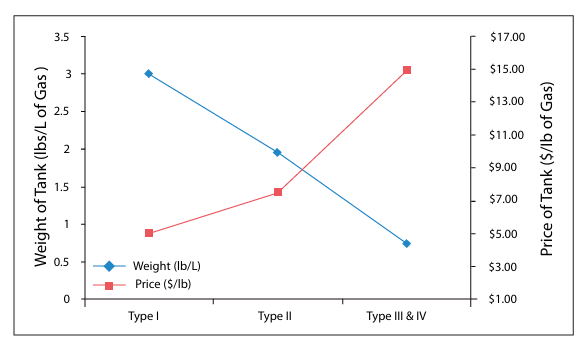

In [31]:
class TankCostCalculator:
    price_per_lb_gas = {
        "Type I": 5.5,
        "Type II": 9.0,
        "Type III & IV": 15.5
    }
    def __init__(self, tank_type, gas_mass_kg):
        self.tank_type = tank_type
        self.gas_mass_kg = gas_mass_kg
        self.gas_mass_lb = gas_mass_kg * 2.20462  # in lb
        self.price_per_lb = self.price_per_lb_gas[tank_type]
        self.extras_df = self.calculate_cost()  # Call calculate_cost during initialization

    def calculate_cost(self):
        CEPCI_2014 = 576.1
        CEPCI_2024 = 798.8
        self.price= (self.gas_mass_lb * self.price_per_lb)* (CEPCI_2024 / CEPCI_2014)
        self.total_material_cost= self.price * 1.2  
        self.construction= self.price * 0.08
        installation_cost = self.price * 2.5
        instrumentation_cost = self.price * 0.08
        self.Final_cost = self.price + self.total_material_cost + self.construction + installation_cost + instrumentation_cost
        cost_mxn= self.Final_cost * 19.61  

        # Create a data frame with the extra costs
        extras = {
            "Total Price (FOB)": [self.price],
            "Installation Cost (USD)": [installation_cost],
            "Total Material Cost (USD)": [self.total_material_cost],
            "Construction Cost (USD)": [self.construction],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [self.Final_cost],
            "Final Cost (MXN)": [cost_mxn]
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)       
        return  self.extras_df


T1="Type I"
T2="Type II"
T3="Type III & IV"


Tanque tipo 1

In [36]:
tank_type = T2
gas_mass = 4   # in ton
calculator1 = TankCostCalculator(tank_type, gas_mass)
calculator1.extras_df


,Total Price (FOB),Installation Cost (USD),Total Material Cost (USD),Construction Cost (USD),Instrumentation Cost (USD),Final Cost (USD),Final Cost (MXN)
0,$110.05,$275.12,$132.06,$8.80,$8.80,$534.83,"$10,487.94"


Tanque tipo 2

In [33]:
tank_type = T2
gas_mass = 1000   # in ton
calculator2 = TankCostCalculator(tank_type, gas_mass)
calculator2.extras_df


,Total Price (FOB),Installation Cost (USD),Total Material Cost (USD),Construction Cost (USD),Instrumentation Cost (USD),Final Cost (USD),Final Cost (MXN)
0,"$27,511.64","$68,779.09","$33,013.96","$2,200.93","$2,200.93","$133,706.56","$2,621,985.56"


Tanque tipo 3

In [34]:
tank_type = T3
gas_mass = 1000   # in ton
calculator3 = TankCostCalculator(tank_type, gas_mass)
calculator3.extras_df


,Total Price (FOB),Installation Cost (USD),Total Material Cost (USD),Construction Cost (USD),Instrumentation Cost (USD),Final Cost (USD),Final Cost (MXN)
0,"$47,381.15","$118,452.88","$56,857.38","$3,790.49","$3,790.49","$230,272.40","$4,515,641.81"


Tanque tipo 4

In [35]:
total= calculator1.price+calculator2.price+calculator3.price
total

74960.04041317826